In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\navie bays and nlp\blogs.csv")

# Display structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [2]:
# Preprocess the Text
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    tokens = text.split()
    tokens = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

# Apply cleaning
df['Cleaned_Data'] = df['Data'].apply(preprocess)


In [3]:
#Feature Extraction using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Cleaned_Data'])

# Labels
y = df['Labels']

In [4]:
#Split the Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Train Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [6]:
#Predict and Evaluate

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.805

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.88      1.00      0.94        22
comp.sys.ibm.pc.hardware       0.68      0.84      0.75        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.87      0.52      0.65        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.64      0.89      0.74        18
         rec.motorcycles       0.92      0.75      0.83        16
      rec.sport.baseball       0.85      0.94      0.89        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.75      0.56      0.64        16
                 sci.med       0.9

In [10]:
pip install textblob



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]

In [11]:
import nltk
nltk.download('brown')
nltk.download('punkt')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
#Use TextBlob for Sentiment Detection

from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

In [13]:
#Analyze Sentiment Distribution

# Count of sentiments overall
print(df['Sentiment'].value_counts())

# Count of sentiments per category
print(df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0))


Sentiment
neutral     1081
positive     782
negative     137
Name: count, dtype: int64
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53      

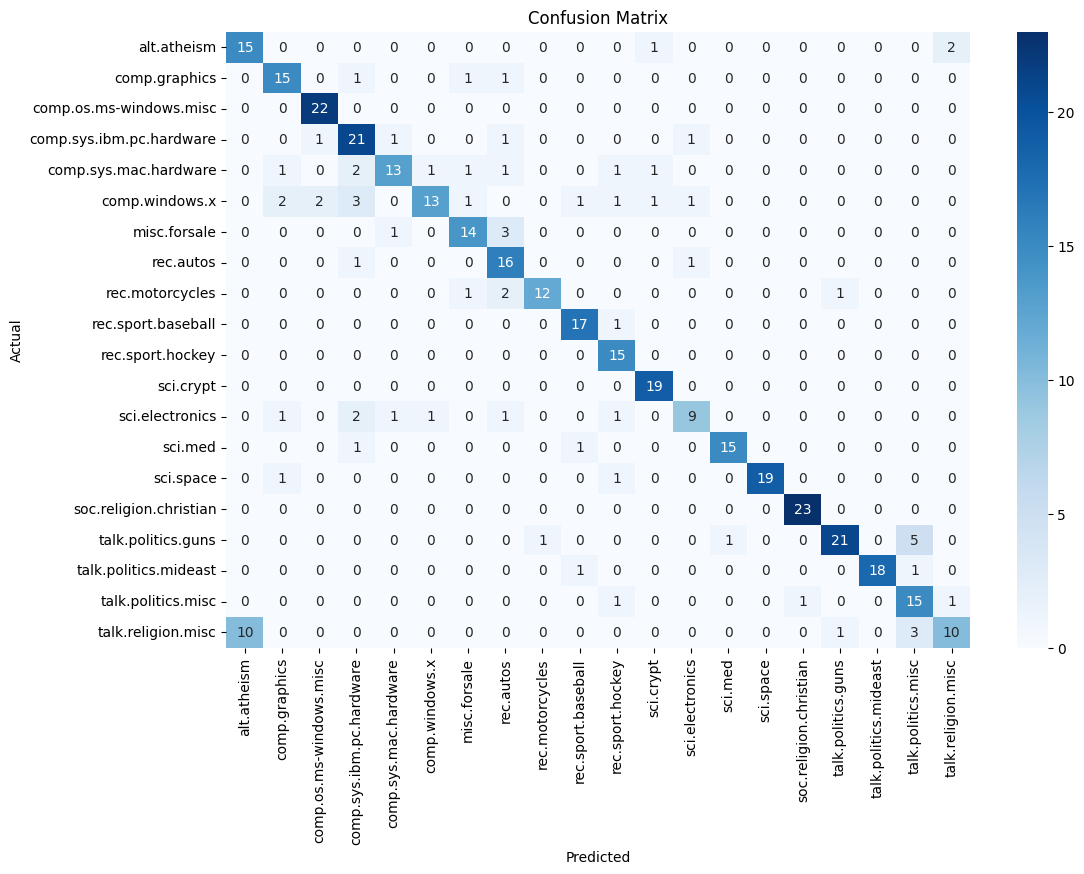

In [14]:
# Discuss Evaluation

# Already printed accuracy and classification report above
# You can add additional metrics like confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()